In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('./data/train.csv', index_col=0)
raw_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [133]:
# 성별 to num
raw_data.loc[:, 'sex'].replace(' Male', 0, inplace=True)
raw_data.loc[:, 'sex'].replace(' Female', 1, inplace=True)

In [143]:
# race to num
races = raw_data.loc[:,'race'].unique()
for i in range(len(races)):
    raw_data.replace(races[i], i, inplace=True)

In [145]:
raw_data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,0,0,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,0,1,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,1,1,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,0,1,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,0,0,0,0,70,United-States,1
6,66,Self-emp-not-inc,274451,9th,5,Married-civ-spouse,Farming-fishing,Husband,0,0,0,0,25,United-States,1
7,56,Private,152874,Bachelors,13,Divorced,Prof-specialty,Unmarried,2,1,0,1741,40,United-States,0
8,70,Self-emp-not-inc,165586,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,0,0,0,0,40,United-States,0
9,21,Private,211013,Assoc-voc,11,Married-civ-spouse,Other-service,Other-relative,0,1,0,0,50,Mexico,0


In [146]:
raw_data.describe()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
count,29305.000000,2.930500e+04,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000,29305.000000
mean,38.659171,1.897357e+05,10.083057,0.283126,0.330456,1084.531786,87.073571,40.440096,0.240403
std,13.743827,1.056348e+05,2.570371,0.741406,0.470385,7495.715677,401.225580,12.332840,0.427335
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


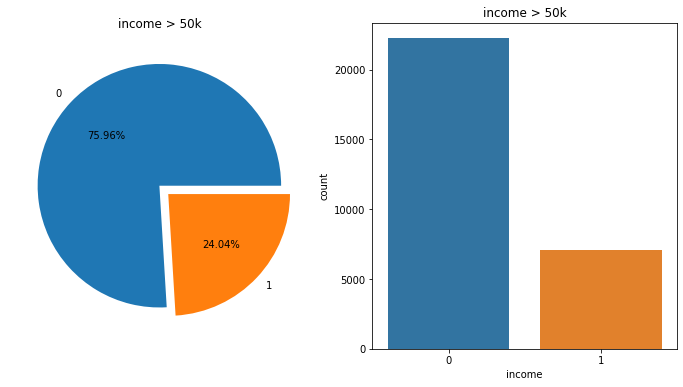

In [5]:
f, ax = plt.subplots(1,2,figsize=(12,6))

raw_data['income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('income > 50k')
ax[0].set_ylabel('')

sns.countplot('income', data=raw_data, ax=ax[1])
ax[1].set_title('income > 50k')
plt.show()

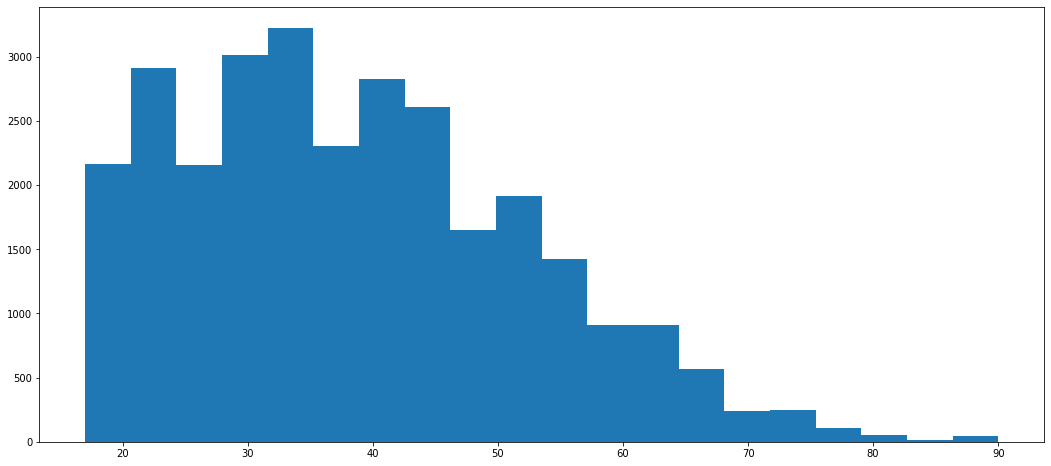

In [151]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False)

In [152]:
raw_data.groupby('workclass').mean()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
workclass,,,,,,,,,
?,40.337342,188229.526158,9.262778,0.334336,0.454600,560.636801,76.977751,32.006615,0.105232
Federal-gov,42.725995,184095.443794,10.926230,0.496487,0.334895,919.757611,120.443794,41.750585,0.382904
Local-gov,41.559422,188656.313169,11.047645,0.372056,0.395610,591.854925,110.760171,40.796574,0.299251
Never-worked,18.600000,175487.800000,6.200000,0.400000,0.400000,0.000000,0.000000,26.000000,0.000000
Private,36.917981,192842.711710,9.876580,0.280059,0.341254,907.441156,78.609603,40.286673,0.219402
Self-emp-inc,45.609929,182642.724417,11.193516,0.106383,0.117528,5410.427558,157.046606,48.716312,0.554205
Self-emp-not-inc,45.513232,175545.089805,10.257267,0.159219,0.157484,1851.702820,113.905423,44.418221,0.278959
State-gov,39.618651,177887.604496,11.409659,0.358035,0.378018,688.802664,76.552040,38.936719,0.262281
Without-pay,50.750000,184202.333333,8.833333,0.166667,0.250000,201.166667,0.000000,33.000000,0.083333


In [153]:
raw_data.groupby('occupation').mean()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
occupation,,,,,,,,,
?,40.272182,188191.331535,9.253597,0.334532,0.454436,558.956235,76.747002,31.988609,0.104916
Adm-clerical,37.245349,192163.925581,10.102616,0.368605,0.676163,410.327326,65.946802,37.722384,0.133140
Armed-Forces,30.000000,201244.500000,9.900000,0.300000,0.000000,0.000000,188.700000,39.400000,0.300000
Craft-repair,38.979075,190916.503029,9.141795,0.210352,0.056993,717.620870,83.889317,42.260463,0.225771
Exec-managerial,42.262677,188359.308396,11.446107,0.185924,0.283181,2277.922970,130.026600,45.018565,0.481851
Farming-fishing,41.099099,173612.060811,8.594595,0.156532,0.061937,779.186937,63.577703,47.092342,0.106982
Handlers-cleaners,32.859087,202844.796637,8.575661,0.334668,0.121697,260.909528,55.550841,38.339472,0.066453
Machine-op-inspct,37.957482,194173.864163,8.490889,0.385422,0.258421,349.891773,66.330204,40.773054,0.131971
Other-service,35.313950,187788.127395,8.772101,0.453109,0.539160,210.418151,39.333445,34.909580,0.043361


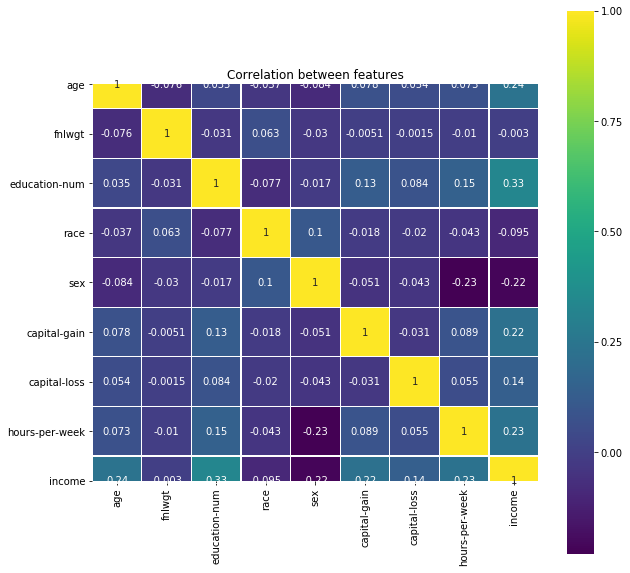

In [157]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

In [155]:
dataset = raw_data[['age', 'education-num', 'sex', 'hours-per-week']]
dataset.tail()

,age,education-num,sex,hours-per-week
no,,,,
29301,20,9,0,40
29302,21,9,0,40
29303,18,6,0,40
29304,33,7,0,65
29305,65,9,1,40


In [46]:
dataset.loc[:, 'sex'].replace(' Male', 0, inplace=True)
dataset.loc[:, 'sex'].replace(' Female', 1, inplace=True)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
dataset.head()

,age,education-num,sex,hours-per-week
no,,,,
1,25,7,0,40
2,39,10,1,55
3,35,13,1,50
4,64,11,1,40
5,24,10,0,70


In [54]:
y = raw_data.loc[:,'income']
y.tail()

no
29301    0
29302    0
29303    0
29304    0
29305    0
Name: income, dtype: int64

## 정규화

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [55]:
minMax = MinMaxScaler()
X = minMax.fit_transform(dataset)
X

array([[0.10958904, 0.4       , 0.        , 0.39795918],
       [0.30136986, 0.6       , 1.        , 0.55102041],
       [0.24657534, 0.8       , 1.        , 0.5       ],
       ...,
       [0.01369863, 0.33333333, 0.        , 0.39795918],
       [0.21917808, 0.4       , 0.        , 0.65306122],
       [0.65753425, 0.53333333, 1.        , 0.39795918]])

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(dataset)
X

array([[-0.9938574 , -1.1994807 , -0.70253315, -0.03568546],
       [ 0.02479914, -0.03231398,  1.42342038,  1.1806002 ],
       [-0.26624559,  1.13485273,  1.42342038,  0.77517165],
       ...,
       [-1.50318567, -1.58853627, -0.70253315, -0.03568546],
       [-0.41176795, -1.1994807 , -0.70253315,  1.99145731],
       [ 1.91658984, -0.42136955,  1.42342038, -0.03568546]])

In [71]:
scaler = RobustScaler()
X = scaler.fit_transform(dataset)
X

array([[-0.6       , -1.        ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  1.        ,  3.        ],
       [-0.1       ,  1.        ,  1.        ,  2.        ],
       ...,
       [-0.95      , -1.33333333,  0.        ,  0.        ],
       [-0.2       , -1.        ,  0.        ,  5.        ],
       [ 1.4       , -0.33333333,  1.        ,  0.        ]])

In [77]:
scaler = QuantileTransformer()
X = scaler.fit_transform(dataset)
X

array([[0.18568569, 0.0985986 , 0.        , 0.47147147],
       [0.55055055, 0.56406406, 1.        , 0.9049049 ],
       [0.44544545, 0.83433433, 1.        , 0.84384384],
       ...,
       [0.02102102, 0.06656657, 0.        , 0.47147147],
       [0.38988989, 0.0985986 , 0.        , 0.97097097],
       [0.95945946, 0.29129129, 1.        , 0.47147147]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)

In [79]:
X_train.shape

(20513, 4)

In [80]:
y_train.shape

(20513,)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
for i in range(1,50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(i, knn.score(X_test, y_test))

1 0.7456778889899909
3 0.7752502274795269
5 0.7829845313921747
7 0.7891264786169245
9 0.7937898089171974
11 0.792083712465878
13 0.7908325750682439
15 0.7958371246587808
17 0.7965195632393085
19 0.7986806187443131
21 0.8007279344858963
23 0.7993630573248408
25 0.7991355777979982
27 0.8000454959053686
29 0.8024340309372157
31 0.8019790718835305
33 0.8026615104640582
35 0.8043676069153776
37 0.8034576888080073
39 0.8027752502274795
41 0.8042538671519563
43 0.8050500454959054
45 0.8051637852593266
47 0.8042538671519563
49 0.8031164695177434


## SVC 사용

In [83]:
from sklearn.svm import SVC

In [88]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

In [89]:
print(svm.score(X_test, y_test))

0.8026615104640582


## PCA 적용

In [90]:
from sklearn.decomposition import PCA
import mglearn

In [92]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
print("원본 데이터 형태:", str(X.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (29305, 4)
축소된 데이터 형태: (29305, 2)


Text(0, 0.5, '두 번째 주성분')

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roamin

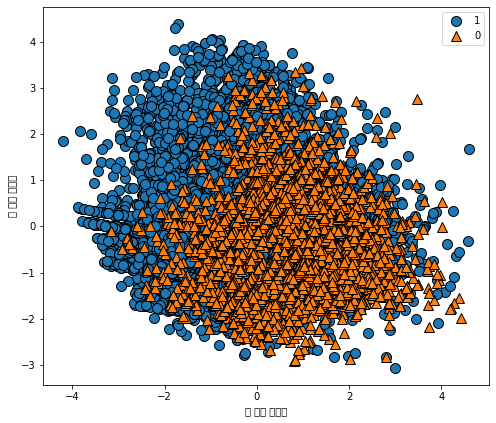

In [95]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(['1','0'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [98]:
pca.components_

array([[ 0.33591145,  0.36433827, -0.57333929,  0.65245933],
       [ 0.41221253, -0.81554031, -0.39309185, -0.10224296]])

Text(0, 0.5, '주성분')

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Py

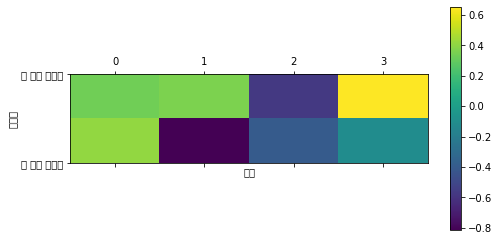

In [99]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xlabel('특성')
plt.ylabel("주성분")